# Stori Data Science Challenge
### Carlos Alberto Gómez Correa

### Table of Contents
* [Data cleaning](#clean)
* [Question 1](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](#section_1_2)
        
* [Question 2](#chapter2)
    * [Section 2.1](#section_2_1)

* [Question 3](#chapter3)
    * [Section 3.1](#section_3_1)
    * [Section 3.2](#section_3_2)
    
* [Miscellaneous](#mis)

* [Conclusión](#conclusion)

El conjunto de datos "df" contiene información no real sobre clientes de tarjetas de crédito. Se han añadido tres columnas adicionales al dataset original, que contienen fechas de activación de la tarjeta, fecha del último pago y si el cliente posee actividad de fraude o no. 

Procedamos a una limpieza de los datos para su posterior análisis. 

### Limpiando el conjunto de datos <a class="anchor" id="clean"></a>

Importemos los datos y llamemos al DataFrame resultante "df".

In [1]:
# Importing data
import pandas as pd
df=pd.read_csv('df.csv')


A continuación, las primeras 10 observaciones de clientes. Se aprecia que hay variables con datos de fecha, datos en cadenas de texto, variables continuas, categóricas y con valores enteros. Nótese además que hay valores en la columna de "minimum_payments" valores en NAN, por lo que se deberá realizar una limpieza de estos datos y verificación de que se encuentren en los formatos correspondientes para el procesamiento. 

In [2]:
df.head(10)

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,6,C10006,2019-10-06,2020-07-27,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,...,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,7,C10007,2019-10-06,2020-10-30,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,...,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,8,C10008,2019-10-06,2020-08-06,1823.652743,1.000000,436.20,0.00,436.20,0.000000,...,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,9,C10009,2019-10-06,2020-10-06,1014.926473,1.000000,861.49,661.49,200.00,NaN,...,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,10,C10010,2019-10-06,2020-05-06,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,...,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


Se tienen 8950 observaciones y para las variables numéricas estas son algunos cálculos estadísticos:

In [3]:
df.describe()

,Unnamed: 0,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8950.000000,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,4475.500000,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2583.786788,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2238.250000,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,4475.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,6712.750000,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


Como se mencionó anteriormente, las columnas "activated_date", "last_payment_date", "balance", "cash_advance", "credit_limit" y "minimum_payments" poseen valores nulos. Más aún, las columnas de fechas no están un formato adecuado para realizar cálculos, por lo que serán modificadas:

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

Se presenta un resumen del número de observaciones con valores nulos por variable, siendo "minimum_payments" la variable que más datos nulos presenta:

In [5]:
df.isna().sum()

Unnamed: 0                            0
cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

Después de modificar los formatos para que las columnas de fecha fueran correctos, se corrobora que este cambio se haya efectuado; "activated_date" y "last_payment_date" estan en formato *datetime*.

In [6]:
# Modifiying date variables to date type 

df['activated_date']= pd.to_datetime(df['activated_date'], infer_datetime_format=True)
df['last_payment_date']= pd.to_datetime(df['last_payment_date'], infer_datetime_format=True)

# Verifiying date columns are in datetime data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        8950 non-null   int64         
 1   cust_id                           8950 non-null   object        
 2   activated_date                    8937 non-null   datetime64[ns]
 3   last_payment_date                 8941 non-null   datetime64[ns]
 4   balance                           8948 non-null   float64       
 5   balance_frequency                 8950 non-null   float64       
 6   purchases                         8950 non-null   float64       
 7   oneoff_purchases                  8950 non-null   float64       
 8   installments_purchases            8950 non-null   float64       
 9   cash_advance                      8838 non-null   float64       
 10  purchases_frequency               8950 non-null 


Derivado del resumen anterior sobre valores nulos, sabemos que tenemos pocos datos con valores NA, así que procedamos a eliminarlos. Nótese que al realizar lo anterior se obtiene el 95% de la data original:

In [7]:
# Deleting na values from dataset and reseting index
df2=df.dropna().drop('Unnamed: 0', axis=1).reset_index(drop=True)

# Calculating % of original data after deleting na values
print("Después de la eliminación de observaciones con NA, obtenemos el",round(df2.shape[0]/df.shape[0]*100,1),"% de la data original.")
print("El dataset ahora contiene", df2.shape[0], "observaciones")

Después de la eliminación de observaciones con NA, obtenemos el 94.9 % de la data original.
El dataset ahora contiene 8497 observaciones


Con esto concluimos la limpieza de la base de datos y podemos comenzar con un análisis descriptivo.

### I. Análisis Exploratorio  <a class="anchor" id="chapter1"></a>

#### I.I <a class="anchor" id="section_1_1"></a>

Al realizar un histograma de de la cantidad de dinero restante en la cuenta para realizar compras (Balance) se nota que existe un sesgo de los datos hacia la derecha. Esto es, la gran mayoría de los datos se concentran en valores pequeños para esta variable.


#### I.II <a class="anchor" id="section_1_2"></a>
Por lo tanto, se infiere que la medida de tendencia central para el balance más adecuada para modelarse será la mediana. Más aún. Al presentarse una concentración en los valores pequeños de este, su media será mas grande que la mediana debido a la afectación que sufre por valores atípicos que se presentan en la cola derecha de los datos, esto es, en valores grandes de balance. 

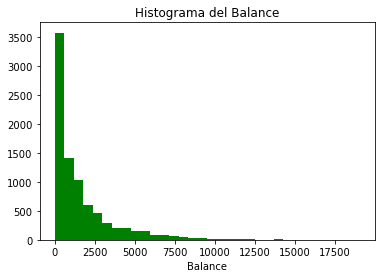

In [8]:
import matplotlib.pyplot as plt

plt.hist('balance', data=df2, bins=32, color='green')
plt.title('Histograma del Balance')
plt.xlabel('Balance')
plt.show()

Para comprobar lo anterior, se calcula la media (1601.88) y la mediana (915.98). Notemos como la mitad de los clientes tienen en su balance una cantidad menor o igual a 915.98, y el 75% posee menos de 2,106.41. Además, el valor mínimo en el balance es de 0 y el máximo de 19,043.13.

In [9]:
df2['balance'].describe()

count     8497.000000
mean      1601.887164
std       2098.154866
min          0.000000
25%        147.838347
50%        915.981419
75%       2106.417286
max      19043.138560
Name: balance, dtype: float64

#### I.III <a class="anchor" id="section_1_3"></a>

Procedamos a calcular la media y mediana del balance de todos los clientes pero agrupados por año y mes de activación de la cuenta. 


In [10]:
from datetime import date as dt

# Balance Mean by year and month
df_balance_year_month=df2.groupby([df2['activated_date'].dt.year.rename('Año'),df2['activated_date'].dt.month.rename('Mes')]).mean()
df_balance_year_month=df_balance_year_month.reset_index()

# Transforming Index to a String, then to a date format
df_balance_year_month['Date']=df_balance_year_month['Año'].astype('str')+'-'+df_balance_year_month['Mes'].astype('str')
df_balance_year_month['Date']=df_balance_year_month['Date'].astype('str')
df_balance_year_month['Date']=pd.to_datetime(df_balance_year_month['Date'])

# Balance median by year and month
df_balance_year_month2=df2.groupby([df2['activated_date'].dt.year.rename('Año'),df2['activated_date'].dt.month.rename('Mes')]).median()
df_balance_year_month2=df_balance_year_month2.reset_index()

# Transforming Index to a String, then to a date format
df_balance_year_month2['Date']=df_balance_year_month2['Año'].astype('str')+'-'+df_balance_year_month2['Mes'].astype('str')
df_balance_year_month2['Date']=df_balance_year_month2['Date'].astype('str')
df_balance_year_month2['Date']=pd.to_datetime(df_balance_year_month2['Date'])

df_balance_year_month2=df_balance_year_month2[['Date','balance']]



# Joining both dataframes for mean and median
df_balance_mean_median=df_balance_year_month.merge(df_balance_year_month2, on='Date', suffixes=('_mean','_median'))
df_balance_mean_median=df_balance_mean_median[['Date','balance_mean','balance_median']]
print('Los datos de media y mediana del balance por mes y año son los siguientes: \n')
df_balance_mean_median



Los datos de media y mediana del balance por mes y año son los siguientes: 



,Date,balance_mean,balance_median
0,2019-10-01,2548.794248,1545.598011
1,2019-11-01,1890.539524,1107.961644
2,2019-12-01,2051.316984,1193.351573
3,2020-01-01,1864.259536,1180.961924
4,2020-02-01,1784.641287,1018.880453
5,2020-03-01,1590.094278,894.357857
6,2020-04-01,1540.150147,969.583332
7,2020-05-01,1249.460309,779.431874
8,2020-06-01,971.212562,518.894713
9,2020-07-01,664.835110,251.144969


Gráficamente los datos anteriores son como sigue:

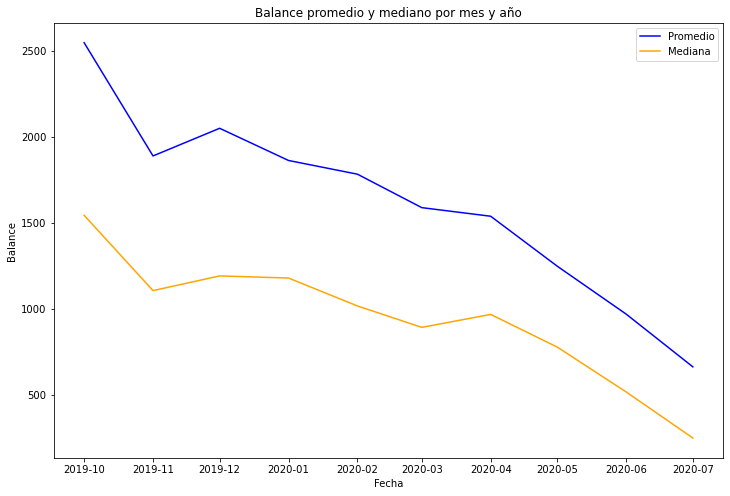

In [11]:
# Plotting
fig = plt.figure(figsize=(12,8))
plt.plot('Date', 'balance_mean', data=df_balance_mean_median, color='b')
plt.plot('Date', 'balance_median', data=df_balance_mean_median, color='orange')

plt.title('Balance promedio y mediano por mes y año')
plt.xlabel('Fecha')
plt.ylabel('Balance')
plt.legend(['Promedio','Mediana'])
plt.show()

Podemos concluir a través de los meses de 2019 a 2020, el balance medio y mediano han tenido una tendencia a la baja, yendo de aproximadamente 2500 y 1500, a 600 y 250, respectivamente. 
También, se nota como la tendencia del sesgo de los datos hacia valores pequeños de balance se mantiene durante todos los meses, estando siempre la mediana por debajo de la media. 

### II. Reporte para el año 2020 <a class="anchor" id="chapter2"></a>

#### II.I <a class="anchor" id="section_2_1"></a>

Supongamos que queremos obtener los datos de clientes que activaron su cuenta y realizaron su último pago durante el 2020.
Necesitamos solo el número de cliente (que se puede obtener del respectivo ID), la fecha de activación en un formato YYYY-MM, y la fecha del último pago en formato YYYY-MM-DD.

Supongamos ademas que se necesita el cálculo de la variable "cash_advance" como porcentaje del límite de crédito, esto es:

$$\frac{Cash~ in~ advance}{Credit~ limit}$$

In [12]:
# Prevent warnings 
import warnings
warnings.filterwarnings("ignore")

# 2020 year in date format
tt=pd.to_datetime('2020')

# Data of customers who activated their account and made their last payment during 2020
df_2020=df2[(df2['activated_date']>=tt) & (df2['last_payment_date']>=tt)]

# Excluding letters from ID column
df_2020['cust_id']=df_2020['cust_id'].str.replace('C','')

# Verifying all values are only numbers
df_2020['cust_id']=df_2020['cust_id'].astype('int')

# Activated date in format YYYY-MM
df_2020['activated_date']=df_2020['activated_date'].dt.strftime('%Y-%m')

# Last payment date is already in YYYY-MM-DD format

# Calculating cash_advance as a percentage of credit_limit
df_2020['cash_ad / credit_limit']=df_2020['cash_advance']/df_2020['credit_limit']



Analicemos la columna del cálculo efectuado de "cash_advance". La media se encuentra en el 25% con un mínimo de 0% y un máximo de 1000%, es decir, existe un cliente que su "cash in advance" es 10 veces más grande que su límite de crédito. 

In [13]:
df_2020['cash_ad / credit_limit'].describe()

count    6016.000000
mean        0.249613
std         0.431361
min         0.000000
25%         0.000000
50%         0.000000
75%         0.388453
max        10.234862
Name: cash_ad / credit_limit, dtype: float64

Esto es un comportamiento inusual, así que mostraremos los clientes que tienen "cash in advance" mayor a su límite de crédito:

In [14]:
df_2020[df_2020['cash_ad / credit_limit']>1]

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,cash_ad / credit_limit
2509,12738,2020-01,2020-05-24,623.955961,0.818182,0.00,0.0,0.00,2119.702403,0.000000,...,0.166667,3,0,1200.0,1838.851003,174.872521,0.250000,12,0,1.766419
2529,12758,2020-01,2020-10-11,5425.936219,1.000000,209.90,0.0,209.90,8223.638112,0.500000,...,0.500000,15,6,7000.0,7723.416753,1274.178071,0.083333,12,0,1.174805
2533,12762,2020-01,2020-09-28,2711.995096,1.000000,600.00,600.0,0.00,5352.991545,0.833333,...,0.583333,8,10,5000.0,1536.484830,841.246469,0.100000,12,0,1.070598
2538,12767,2020-01,2020-10-23,2061.835735,1.000000,0.00,0.0,0.00,4320.771337,0.000000,...,0.500000,12,0,4000.0,5451.599084,556.327998,0.200000,12,0,1.080193
2569,12800,2020-01,2020-10-04,738.956988,1.000000,0.00,0.0,0.00,1561.133958,0.000000,...,0.333333,6,0,1500.0,1979.193103,198.854631,0.100000,12,0,1.040756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,19104,2020-07,2020-05-21,1382.936306,0.875000,336.00,0.0,336.00,4158.990631,0.875000,...,0.125000,5,7,4000.0,754.256439,681.059427,0.600000,8,0,1.039748
8421,19109,2020-07,2020-05-04,380.839064,0.857143,0.00,0.0,0.00,703.941544,0.000000,...,0.428571,13,0,500.0,321.382010,123.667130,0.000000,7,0,1.407883
8435,19123,2020-07,2020-06-04,23.116625,0.125000,0.00,0.0,0.00,921.973821,0.000000,...,0.250000,5,0,500.0,586.173293,16.194932,0.000000,8,0,1.843948
8436,19124,2020-07,2020-10-23,931.907808,1.000000,1142.12,0.0,1142.12,1113.924335,1.000000,...,0.285714,3,14,1000.0,957.421268,1064.015704,0.000000,7,0,1.113924


In [15]:
print('El número de clientes con este porcentaje mayor al 100% son:\n',df_2020[df_2020['cash_ad / credit_limit']>1].shape[0])

El número de clientes con este porcentaje mayor al 100% son:
 303


A continuación se muestra la tabla final con la información requerida en sus formatos solicitados, de los clientes para el año 2020:

In [16]:
df_2020_final_table=df_2020[['cust_id','activated_date','last_payment_date','cash_advance','credit_limit','cash_ad / credit_limit']]
df_2020_final_table

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,cash_ad / credit_limit
2481,12709,2020-01,2020-05-08,2431.292076,8000.0,0.303912
2482,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2483,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2484,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2485,12714,2020-01,2020-04-26,78.763096,1500.0,0.052509
...,...,...,...,...,...,...
8492,19184,2020-07,2020-08-10,0.000000,500.0,0.000000
8493,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8494,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8495,19189,2020-07,2020-07-19,36.558778,500.0,0.073118


### III. Modelo predictivo para fraude <a class="anchor" id="chapter3"></a>

A través de las columnas de este conjuto de datos, podemos utilizarlas como features para predecir la categoría de fraude de un cliente. 

Utilizaremos distintos modelos, incluyendo de ensamble y regresión, para quedarnos con el mejor.

Inicialmente, se calculará el porcentaje de clientes con calidad de fraude respecto de los no fraude:

In [17]:
# Changing fraud to a int value
df2['fraud']=df2['fraud'].astype('int')
df2['fraud'].describe()


# Ratio of fraud

print('El ratio de fraudes respecto al total de casos es:',df2['fraud'].value_counts()[1]/len(df2))

El ratio de fraudes respecto al total de casos es: 0.0080028245263034


In [18]:
df2['fraud'].value_counts()

0    8429
1      68
Name: fraud, dtype: int64

Por lo anterior, se aprecia que existe un desbalance entre las categorías de fraude y no fraude. Esto es, el número de clientes que no estan etiquetados como fraude son mucho mayores (mas de 8,000) que los no fraude (menos de 70).

Analicemos esto gráficamente:

In [19]:
# Defining a function in order to plot the ratio of fraud versus no fraud clients
def sample_plot(X,y):
    plt.scatter(X[y==0]['balance'], X[y==0]['payments'], label='No fraude',linewidth=0.13, alpha=0.4)
    plt.scatter(X[y==1]['balance'], X[y==1]['payments'], label='Fraude',linewidth=0.13, alpha=0.4)
    plt.legend()
    return plt.show()

Claramente tenemos un problema de desbalance en los datos debido a la baja tasa de fraude. 

In [20]:
# Creating X and y vectors for model input
X=df2.iloc[:,3:20]
y=df2.loc[:,'fraud']

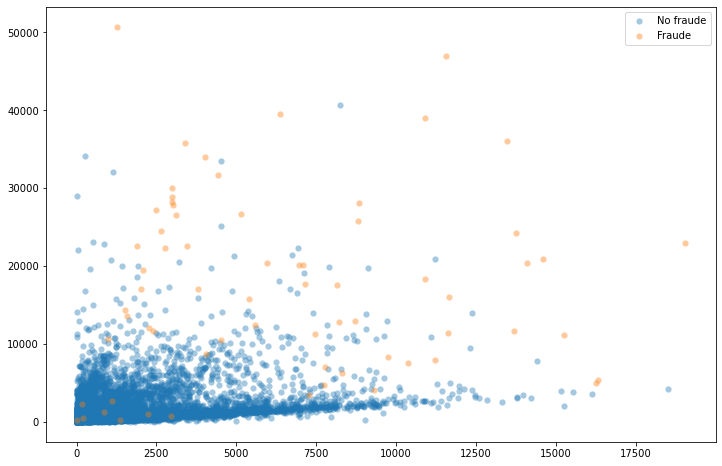

In [21]:
fig= plt.figure(figsize=(12,8))

sample_plot(X,y)

In [22]:
no_fraud=len([i for i in y if i==0])
print('Porcentaje de no fraude en el dataset: \n')
print(no_fraud/len(y))

Porcentaje de no fraude en el dataset: 

0.9919971754736966


Después de ver la gráfica, se nota mejor la desproporción que existe entre las dos categorías, pues el porcentaje de cliente con no fraude es de más del 99%.

Procedamos a resolver este problema a través de la imputación de nuevos datos que simulen el comportamiento de los clientes con fraude. Lo anterior se realizará mediante el algoritmo Synthetic Minority Over-sampling Technique (SMOTE), que, mediante las distancias entre los puntos catalogados como fraude del dataset, realiza una síntesis de nuevos valores que sean muy cercanos (con respecto a su distancia uno del otro, en un cierto espacio) a los valores reales con la etiqueta de fraude. Creará estos nuevos puntos o datos hasta que la cantidad de datos de las dos categorías sea muy parecida. 

Después de resolver este problema, se efectuará el ajuste de los modelos.

**Observación:**
Una métrica que no nos sirve como una buena medida del desempeño de un modelo para la clasificación de fraude es, en este caso debido al desbalanceo, el *accuracy* dado por:

$$Accuracy=\frac{True~Positive~+~True~Negative}{Total}$$

Esto se debe a que, si clasificaramos a todos los datos como no fraude, clasificaríamos bien al 99% de los datos por ser esta su proporción en el dataset. Pero estaríamos clasficando mal a todos los clientes con la etiqueta de fraude, lo cual no es lo que buscamos. 

Por lo tanto, las medidas que nos ayudarán serán las que tengan que ver con los datos positivos (clientes con fraude) bien clasificados, es decir, los valores True Positive:

$$Recall=\frac{TP}{TP+FN}$$

$$Precision=\frac{TP}{TP+FP}$$

####  Modelo de Regresión Logística

#### III.I <a class="anchor" id="section_3_1"></a>

Antes de efectuar cualquier ajuste, debemos realizar la división del conjunto de datos en el set de entrenamiento y el set de prueba. Usaremos una proporción 70%-30%, respectivamente. 

In [23]:
#! pip install imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import imblearn
from sklearn import metrics

In [24]:
from sklearn.metrics import classification_report

Dado que tenemos este imbalance en los casos de fraude, efectuemos resampling mediante SMOTE para balancear las proporciones de las categorias de fraude. 

Notemos que el resampleo se efectuará sobre el set de entrenamiento únicamente, para que al momento de verificar las métricas de precisión del modelo, se efectúe con datos reales y no sintéticos.

Después del resampleo, el nuevo conjunto de datos del set de entrenamiento queda gráficamente como sigue. Nótese como hay más equilibrio de valores para ambas categorías:

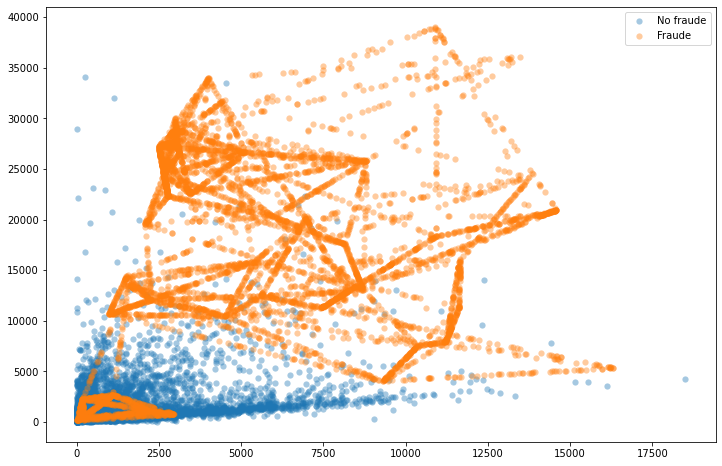

In [25]:
# Trainig and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

# Creating and fitting SMOTE resampler method to train set
resampler=SMOTE()
X_res, y_res=resampler.fit_resample(X_train, y_train)

# Plotting
fig= plt.figure(figsize=(12,8))
sample_plot(X_res,y_res)


Después del resampleo, se elimina el problema de desbalanceo de los datos. Por lo tanto, podemos ajustar a este nuevo data set de entrenamiento un modelo de regresión logística para la clasificación.

Calculemos además la matriz de confusón de los resultados para el set de prueba:


In [26]:
# Logistic Regression model
lg_model=LogisticRegression()
lg_model.fit(X_res,y_res)

# Getting predictions from model
predicted=lg_model.predict(X_test)

# Obtaining results

print(metrics.confusion_matrix(y_test,predicted))

[[2418  109]
 [   2   21]]


In [27]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2527
           1       0.16      0.91      0.27        23

    accuracy                           0.96      2550
   macro avg       0.58      0.93      0.63      2550
weighted avg       0.99      0.96      0.97      2550



Notemos que por el valor tan bajo de Precision, tenemos una gran tasa de Falsos positivos, es decir, clientes que estan clasificados por fraude pero no lo son. Sin embargo, el valor del recall es bastante alto, por lo que se está clasificando correctamente a la gran mayoría de clientes con fraude. 

Verifiquemos si podemos mantener este recall y aumentar la precision para eliminar el problema de falsas alarmas en cuestión de fraude. 

Ajustemos ahora un modelo de ensamble para observar si las métricas anteriores pueden mejorar. Para esto, se realizará una optimización de hiperparámetros del modelo de ensamble Random Forest para lograr obtener el mejor. Los hiperparámetros a probar serán el número de covariables, el número de árboles en el bosque, el criterio de split  y la profundidad del árbol. 

Esta optimización se realizará buscando mejorar la métrica *precision*.

Note además que para resolver el problema de desbalanceo, se colocará un peso mayor a los datos con etiqueta de fraude a través del parámetro *class_weight*.

#### Random Forest

In [28]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Defining the parameter grid for Random Forest
param_grid={'max_features':['log2','auto'],'n_estimators':[5,10,20],'criterion':['gini','entropy'],'max_depth':[3,5,7,9,10]}

# Random Forest model
RF=RandomForestClassifier(random_state=42, class_weight='balanced_subsample')

#Applying Grid Search for getting the best model regarding precision score
BestRF=GridSearchCV(estimator=RF,param_grid=param_grid, cv=4, scoring='precision')

BestRF.fit(X_train, y_train)


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [5, 10, 20]},
             scoring='precision')

Así, obtenemos que el mejor modelo será con los siguiente valores de hiperparámetros:

In [30]:
BestRF.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 5}

De esta manera notemos como la precision mejoró. Sin embargo, el recall dimsinuyó considerablemente:

In [31]:
# Calculating predictions with the ParamGrid Random Forest Model
RF_pred=BestRF.predict(X_test)
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2527
           1       0.85      0.48      0.61        23

    accuracy                           0.99      2550
   macro avg       0.92      0.74      0.80      2550
weighted avg       0.99      0.99      0.99      2550



Análogamente, efectuemos la optimización de hiperparámetros para un modelo Decision Tree mediante el hiperparámetro *ccp_alpha* que poda los nodos del árbol que no son efectivos para clasificación. Como en el caso del Random Forest, se soluciona el problema del balanceo mediante *class_weight*.

Ahora, el objetivo con este modelo es mejorar la métrica *recall*.

In [32]:
param_grid_tree={'ccp_alpha':np.linspace(0,1,100)}
DT_param=DecisionTreeClassifier(random_state=5, class_weight="balanced")
BestDT=GridSearchCV(estimator=DT_param, param_grid=param_grid_tree, cv=4, scoring='recall')

BestDT.fit(X_train, y_train)
print(BestDT.best_params_)

DT_pred=BestDT.predict(X_test)
print(classification_report(y_test,DT_pred))


{'ccp_alpha': 0.020202020202020204}
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2527
           1       0.09      0.83      0.17        23

    accuracy                           0.93      2550
   macro avg       0.55      0.88      0.57      2550
weighted avg       0.99      0.93      0.95      2550



Mediante el reporte de métricas anterior, notamos como si bien mejoró el recall, la precision disminuyó demasiado. También se obtuvo el valor adecuado de *ccp_alpha*.

Mejoremos los valores de este reporte mediante el ensamble de estos tres modelos. 

Se utilizarán los valores obtenidos para cada modelo en su optimización de hiperparámetros, y para el problema de desbalanceo, se utilizará una carga de peso para los datos a razón de 1 y 15 para los clientes con no fraude y con fraude, respectivamente. Lo anterior se realizará mediante el parámetro *class_weight* que permite asignar pesos manualmente a las etiquetas de clasificación. 



#### Ensemble Model

In [33]:
from sklearn.ensemble import VotingClassifier
# Creating a ensemble model with Logistic Regression, Random Forest and Decision Tree

# Logistic Regression Model
lg_model_ensemble=LogisticRegression(random_state=42,class_weight={0:1, 1:15})

# Random Forest Model
RF_ensemble=RandomForestClassifier(class_weight={0:1, 1:15},criterion='entropy',max_depth=9,max_features='log2',n_estimators=5, random_state=28)

# Decision Tree model
DT=DecisionTreeClassifier(random_state=5, class_weight={0:1, 1:15},ccp_alpha=0.020202020202020204)


Una vez inicializados los modelos, se les asignarán pesos a cada uno con el fin de mejorar el performance global del modelo de ensamble. 

Para el caso de detección de fraude, supondremos que se desea detectar tantos casos de fraude como sea posible, y que los casos de falsos fraudes quedan en segundo plano de importancia. Es decir, de todos los valores positivos, queremos clasificar correctamente la mayor parte de ellos, lo que se traduce en maximizar lo siguiente:

$$\frac{Well~classified}{All~Positive~values}=\frac{True~Postive}{True~Positive~+~False~Negative}=Recall$$


Por lo tanto, dado que el modelo de Regresión Logística sobresalió en la métrica de recall, este modelo tendrá una importancia mayor (de 5 puntos). Como el Decision Tree fue el segundo con un recall alto, se le asignarán 2 puntos de importancia, dejando al Random Forest en último lugar con un peso de 1, que fue el modelo con el mejor performance respecto a la precision. 

In [34]:
#Ensemble model
Ensemble_Model=VotingClassifier(estimators=[('lr',lg_model_ensemble),('rf',RF_ensemble),('dt',DT)],weights=[5,1,2],flatten_transform=True)

Ensemble_Model.fit(X_train, y_train)
EnsemblePred=Ensemble_Model.predict(X_test)

print(metrics.confusion_matrix(y_test,EnsemblePred))
print(classification_report(y_test,EnsemblePred))

[[2510   17]
 [   3   20]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2527
           1       0.54      0.87      0.67        23

    accuracy                           0.99      2550
   macro avg       0.77      0.93      0.83      2550
weighted avg       0.99      0.99      0.99      2550



Notemos como a comparación de los modelos individuales, el valor de la precisión se elevó considerablemente a más del 50% sin comprometer demasiado el recall de 91%, obtenido con el modelo logístico, dejándolo en 87%.

#### III.II <a class="anchor" id="section_3_2"></a>

Analicemos para los modelos individuales cuáles fueron las variables más significativas en la predicción de categorías de fraude. 

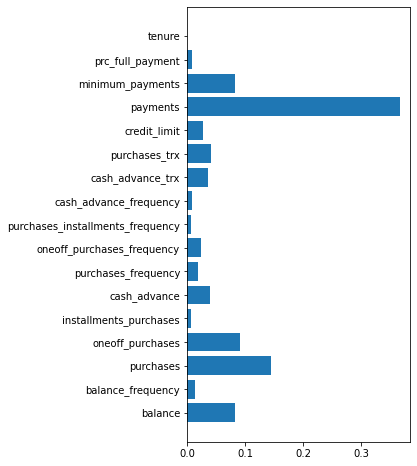

In [35]:
# Fitting Random Forest and Decision Tree
RF_ensemble.fit(X_train,y_train)
DT.fit(X_train,y_train)

# Feature importance for Random Forest
b=pd.array(X.columns)
fig=plt.figure(figsize=(4,8))
plt.barh(b,RF_ensemble.feature_importances_)
plt.show()


Por la gráfica anterior, se nota que en el Random Forest las variables de 'payments', 'minimum_payments', 'oneoff_purchases', 'purchases' y 'balance' son las mas poderosas para la predicción.

Efectuemos lo análogo para el árbol de decisión:

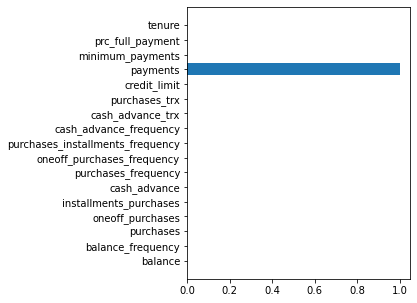

In [36]:
# Feature importance for DecisionTree
fig=plt.figure(figsize=(4,5))
plt.barh(b,DT.feature_importances_)
plt.show()



Por otro lado, para el Decision Tree ajustado, la variable de pagos fue la más significativa, lo que coincide con el Random Forest. 

#### IV. Micellaneous <a class="anchor" id="mis"></a>

Con las variables obtenidas por su gran nivel de significancia en los modelos de Random Forest y Decision Tree ('payments', 'minimum_payments', 'oneoff_purchases', 'purchases' y 'balance'), se confeccionará un ajuste de una Máquina de Soporte Vectorial (SVM) para el dataset de entrenamiento y se verificará su contraste en las métricas de Recall y de Precision con los modelos anteriores. 

*Nota: Se intentó realizar una optimización de hiperparámetros, pero tuvo un gran costo computacional, lo que no permitió verificar la existencia de un mejor modelo. Los valores de los hiperparámetros presentados en la Máquina de Soporte Vectorial siguiente se obtuvieron mediante varias pruebas hasta converger a una solución aceptable.*

In [37]:
from sklearn import svm

# Training and testing data with only the selected features
X_newTrain=X_train[['payments','minimum_payments','oneoff_purchases','purchases','balance']]
X_newtest=X_test[['payments','minimum_payments','oneoff_purchases','purchases','balance']]

#Paramgrid for SVM
# paramgrid_svm={'kernel':['linear','poly']}

SVMModel=svm.SVC(random_state=42, class_weight='balanced', kernel='poly',C=0.00001,degree=4)
BestSVM=SVMModel
# BestSVM=GridSearchCV(estimator=SVMModel, param_grid=paramgrid_svm, cv=4, scoring='recall')

BestSVM.fit(X_newTrain,y_train)

SVMModel_pred=BestSVM.predict(X_newtest)
print(classification_report(y_test,SVMModel_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2527
           1       0.38      0.87      0.53        23

    accuracy                           0.99      2550
   macro avg       0.69      0.93      0.76      2550
weighted avg       0.99      0.99      0.99      2550



Notemos como los valores de *precision* y de *recall* son muy parecidos a los obtenidos con el modelo de ensamble.

#### V. Conclusión <a class="anchor" id="conclusion"></a>

Se realizó un análsis del conjunto de datos de tarjetas de crédito, obteniendo insights de los comportamientos de la variable *balance* de manera general, y a través del tiempo utilizando sus medidas de tendencia central. 

Se obtuvo además un conjunto de datos de los clientes, con campos requeridos, en formatos específicos, para el año 2020.

Finalmente, se ajustaron modelos de predicción para la variable de fraude, resolviendo el problema de desbalanceo de los datos y realizando modelos de ensamble para obtener uno más robusto. Además, se seleccionaron las covariables más significativas para confeccionar una Máquina de Soporte Vectorial con menos complejidad, más eficiente y con resultados muy similares a los del modelo de ensamble. Se intentó mejorar esta Máquina de Soporte Vectorial a través de un GridSearchCV, sin embargo, el costo commputacional hacía que se tardara demasiado, por lo que muchos hiperparámetros no fueron probados, así que no se logró verificar si se podían mejorar las métricas buscadas con un modelo que utilizara menos covariables. $\blacksquare$